In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
def membership_function(x, a, s):
    return 1 - abs(x-a) / s

In [8]:
linguistic_term = ["VS", "SLOW", "MED", "FAST", "VF"]
rules = [(x1,x2) for x1 in linguistic_term for x2 in linguistic_term]
conclusion = ['VS','SLOW','SLOW','MED','MED','SLOW','SLOW','SLOW','MED','FAST','SLOW','SLOW','MED','FAST','FAST','MED','MED','FAST','FAST','VF','MED','MED','FAST','VF','VF']

In [89]:
vv_mfunc = [("VS",3,5), ("SLOW",20,30), ("MED", 50, 20),("FAST",70,25), ("VF",100,10)]
pv_mfunc = [("VS", 5,5), ("SLOW", 10, 5),("MED",30,20),("FAST",40,20),("VF",100,60)]
fv_mfunc = [('VS',0,20),('SLOW',25,15),('MED',50,20),('FAST',75,15),("VF",100,20)]

In [71]:
def plot_mfunc(mfunc, max_value):
    x = np.linspace(0,max_value,10000)
    plt.figure(figsize=(12, 4), dpi=80)
    for (l, a, s) in mfunc:
        plt.plot(x, membership(x,a,s), label=l)
    plt.title('MENBERSHIP FUNCTIONS')
    plt.legend(loc="upper right")
    plt.ylim(0,1)
    plt.xlim(0,max_value)
    plt.show()

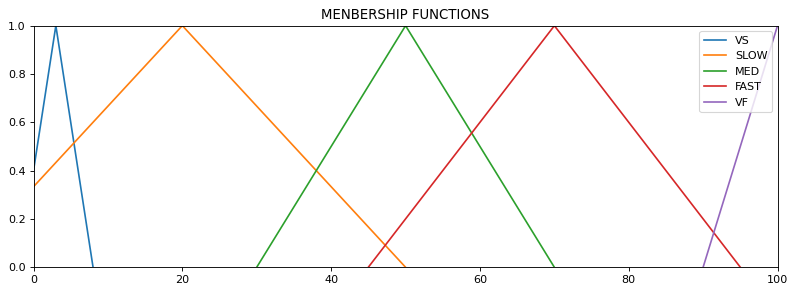

In [87]:
plot_mfunc(vv_mfunc, 100)

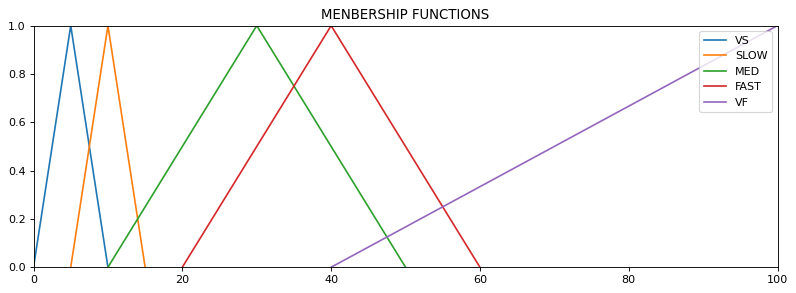

In [88]:
plot_mfunc(pv_mfunc, 100)

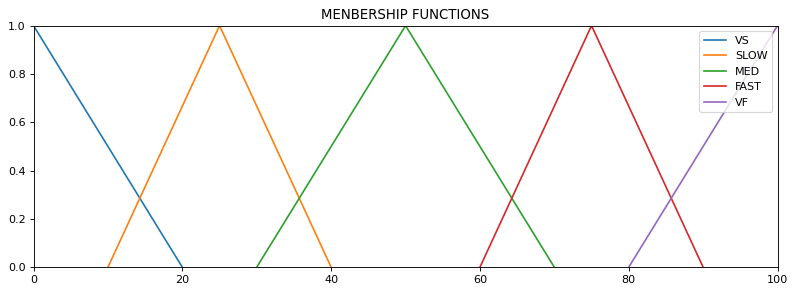

In [90]:
plot_mfunc(fv_mfunc, 100)

In [141]:
vv_input = int(input('vaccum velocity (0-100 m/s):'))
pv_input = int(input('pump propeller velocity (0-100 l/s):'))

vaccum velocity (0-100 m/s):35
pump propeller velocity (0-100 l/s):50


In [142]:
def fuzzification(inpt, fuzzy_set):
    fuzzy = np.zeros((len(fuzzy_set)))
    for idx, (linguistic, a, s) in enumerate(fuzzy_set):
        membership_value = membership_function(inpt, a, s)
        if membership_value > 0:
            fuzzy[idx] = membership_value
        
    return fuzzy

In [143]:
vv_fuzzy = fuzzification(vv_input, vv_mfunc)
pv_fuzzy = fuzzification(pv_input, pv_mfunc)

In [146]:
input_system = [vv_input, pv_input]

In [147]:
def alpha_cut(fuzzy1, fuzzy2, output_membership, conclusion):
    conclusion = np.asarray(conclusion).reshape(len(fuzzy1), len(fuzzy2))
    output_fuzzy = [0] * len(output_membership)
    hedge = [h for (h, _, _) in output_membership]
    for i in range(len(fuzzy1)):
        for j in range(len(fuzzy2)):
            if min(fuzzy2[j],fuzzy1[i]) > 0:
                output_fuzzy[hedge.index(conclusion[i][j])] = max(min(fuzzy2[j],fuzzy1[i]),output_fuzzy[hedge.index(conclusion[i][j])])


    return output_fuzzy

In [148]:
fv_fuzzy = alpha_cut(vv_fuzzy, pv_fuzzy, fv_mfunc, conclusion)

In [149]:
def plot_fuzzy_output(mfunc, max_value,alpha_cut):
    yb = []
    x = np.linspace(0,max_value,1000)
    plt.figure(figsize=(12, 4), dpi=80)
    for (l, a, s) in mfunc:
        plt.plot(x, membership_function(x,a,s),'b')
    for i, alpha in enumerate(alpha_cut):
        c = 0
        if alpha > 0 and alpha < 1:
            y = membership_function(x,mfunc[i][1],mfunc[i][2])
            for j in range(len(y)):
                if y[j] > alpha:
                    y[j] = alpha
                    c += 1
            plt.fill_between(x,y, color='b')
            yb.append((list(y).index(alpha)*2 + c)*0.05)
        else:
            yb.append(0)
    plt.title('FUZZY SET OUTPUT')
    plt.ylim(0,1)
    plt.xlim(0,max_value)
    plt.show()
    return yb

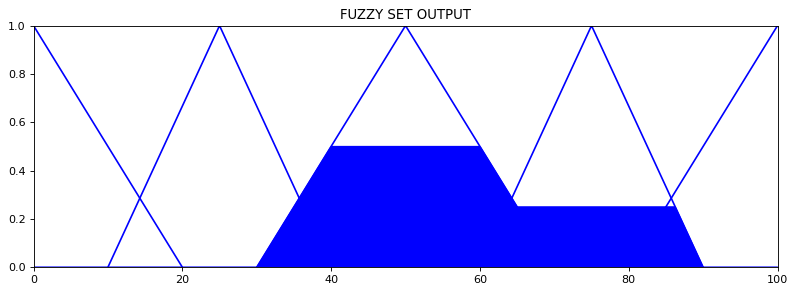

In [150]:
yb = plot_fuzzy_output(fv_mfunc, 100, fv_fuzzy)

In [155]:
def defuzzification(yb, output_fuzzy):
    centroid = sum([output_fuzzy[i]*yb[i] for i in range(len(yb))])/sum(output_fuzzy)
    return centroid

In [156]:
centroid = defuzzification(yb, fv_fuzzy)
print("fan velocity:", centroid)

fan velocity: 58.31666666666666
